## **Most Common Fire Type**

In [4]:
import pandas as pd
import numpy as np
import math 
%matplotlib inline
import matplotlib.pyplot as plt

#/////////////////////////////////////////////////////////

raw_dataset = pd.read_csv("https://data.wprdc.org/datastore/dump/8d76ac6b-5ae8-4428-82a4-043130d17b02")
fire_incidents = pd.DataFrame(raw_dataset)
fire_incidents = fire_incidents.drop(columns = ['latitude', 'longitude', 'tract','census_tract'])

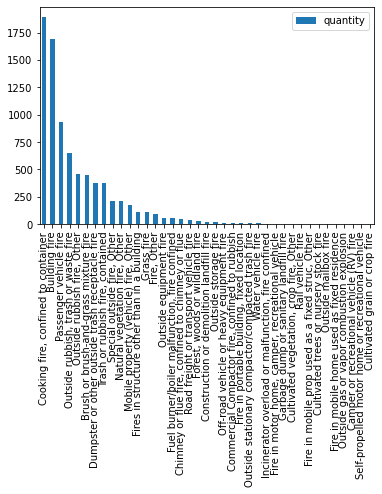

In [6]:
idx = 0
for town in fire_incidents['address']:
    if not('PITTSBURGH' in town):
        fire_incidents = fire_incidents.drop(idx)
    idx = idx + 1
fire_incidents.index = range(len(fire_incidents))

fire_types = pd.DataFrame({"quantity" : pd.Series(fire_incidents['type_description'].value_counts())})
fire_types.plot(kind="bar")

## **Number of Alarms Per Neighborhood**

In [8]:
alarm_dict = {'alarms' : pd.Series(fire_incidents['alarms']), 'neighborhood': pd.Series(fire_incidents['neighborhood'])}
alarms_per_neighborhood = pd.DataFrame(alarm_dict)
alarm_counts = alarms_per_neighborhood.groupby('neighborhood', axis=0).count()

In [9]:
alarm_arr = []
for num in alarm_counts['alarms']:
    alarm_arr.append(num)
alarm_arr.sort()

In [10]:
top_five = {}
top_five_names = []
alarm_idx = len(alarm_arr) - 1
limit = alarm_idx - 8

while alarm_idx > limit:
    name = alarm_counts[alarm_counts['alarms'] == alarm_arr[alarm_idx]].index[0]
    top_five_names.append(name)
    top_five[name] = alarm_arr[alarm_idx]
    alarm_idx = alarm_idx - 1

In [11]:
top_five_alarms = pd.Series(top_five).to_frame('total_number_of_alarms')
print(top_five_alarms)

                           total_number_of_alarms
Carrick                                       263
Central Business District                     233
South Side Flats                              225
Hazelwood                                     217
East Liberty                                  188
Mount Washington                              184
Lincoln-Lemington-Belmar                      177


## **Breakdown of Fire Types per Top Five Neighborhoods**

In [12]:
types_dict = {'alarms' : pd.Series(fires['alarms']), 
              'neighborhood': pd.Series(fires['neighborhood']),
             'types_of_alarms' : pd.Series(fires['type_description'])}
types = pd.DataFrame(types_dict)

NameError: name 'fires' is not defined

In [149]:
def types_per_town(town_name,types):
    town_dict = {}
    idx = 0
    for town in types['neighborhood']:
        if town == town_name:
            if types['types_of_alarms'][idx] not in town_dict:
                town_dict[types['types_of_alarms'][idx]] = types['alarms'][idx]
            else:
                town_dict[types['types_of_alarms'][idx]] += types['alarms'][idx]
        idx = idx + 1
    return town_dict

def del_zero_alarms(town_dict):
    to_del = []
    for k,v in town_dict.items():
        if v == 0:
            to_del.append(k)
    for n in to_del:
        town_dict.pop(n)
    return town_dict

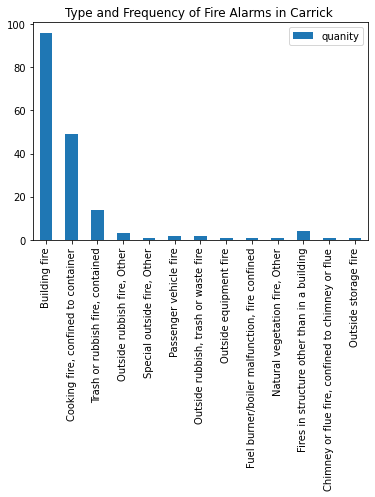

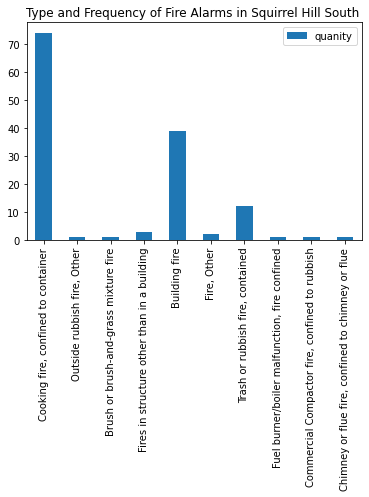

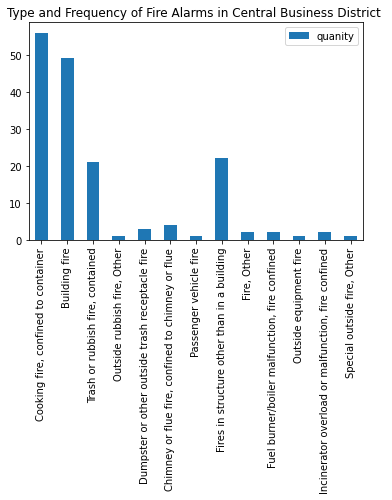

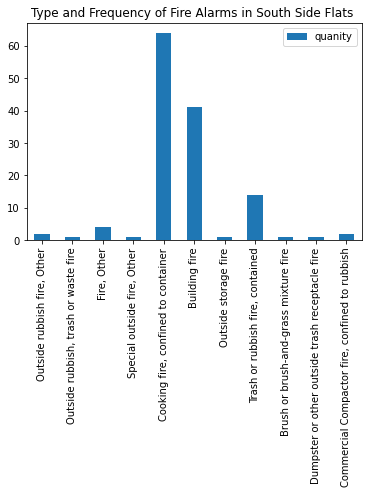

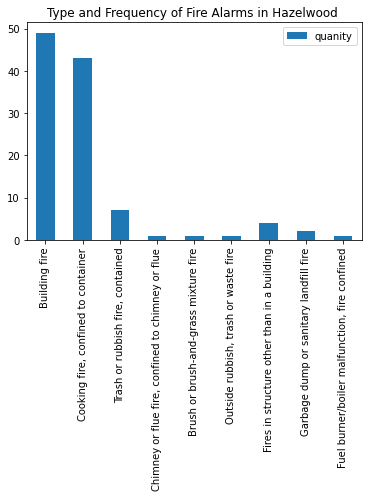

In [166]:
for n in top_five_names:
    town_dict = del_zero_alarms(types_per_town(n, types))
    town = pd.Series(town_dict).to_frame('quanity')
    town.plot(kind = 'bar', title = f"Type and Frequency of Fire Alarms in {n} ")
    #print(f"Total number of alarms in {n} is {top_five_alarms['total_number_of_alarms'][n]}")